In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [72]:
df1 = pd.read_excel('./data/clean_data2021.xlsx')
df2 = pd.read_excel('./data/clean_data2022.xlsx')
df3 = pd.concat([df1,df2],axis=0)
df3

,内容,正文长度,情感分值
0,这是一篇搁置了两个月的游记虽然对三亚行程记忆犹新只是不知道该如何用文字描述这种悸动终于有时间...,18592,0.9954
1,第一次来写游记这次跟以往每一次出去玩都信誓旦旦的说我要记录下来不一样这次我真的来写了原本计划...,12460,0.9886
2,浓浓秋意由西至东从北到南地拂遍祖国大地向往温暖阳光的候鸟们即将蠢蠢欲动准备启程远航它们心驰神...,9256,0.3345
3,11请到天涯海角来请到天涯海角来这里四季春常在海南岛上春风暖好花叫你喜心怀经历过这不平凡的2...,17151,0.9966
4,久违了阔别250多天后才出发原本今年2月就打算去韩国转一圈各种装备攻略签证都搞定了然而五一那...,11980,0.9959
...,...,...,...
2289,海南不止有三亚的四大海湾三大雨林三大旅游海岛还有中部地区的原始雨林黎苗风情还有西部地区更纯天...,3057,0.9985
2290,第四站亚龙湾热带天堂森林公园4A景区亲临冯小刚执导葛尤舒琪主演的非诚勿扰2情美大片拍摄地是上...,289,0.9941
2291,长沙机场候机中推荐一个朋友小雨专业做海南旅游定制的可以帮你代订景区门票酒店比你在平台上定便宜...,492,0.9956
2292,超级大的螃蟹亚龙湾海鲜广场吃的海鲜加火锅食材和加工费总共800多厨师烧的很不错四个人吃的很H...,584,0.9949


根据情感分析去统计内容的情感分布，得出大部分文章内容集中在0.8-1之间，说明大多数都是好评为主

In [3]:
df3.head()

,内容,正文长度,情感分值
0,这是一篇搁置了两个月的游记虽然对三亚行程记忆犹新只是不知道该如何用文字描述这种悸动终于有时间...,18592,0.9954
1,第一次来写游记这次跟以往每一次出去玩都信誓旦旦的说我要记录下来不一样这次我真的来写了原本计划...,12460,0.9886
2,浓浓秋意由西至东从北到南地拂遍祖国大地向往温暖阳光的候鸟们即将蠢蠢欲动准备启程远航它们心驰神...,9256,0.3345
3,11请到天涯海角来请到天涯海角来这里四季春常在海南岛上春风暖好花叫你喜心怀经历过这不平凡的2...,17151,0.9966
4,久违了阔别250多天后才出发原本今年2月就打算去韩国转一圈各种装备攻略签证都搞定了然而五一那...,11980,0.9959


In [5]:
data1 = df3[df3['情感分值'] > 0.9]
data2 = df3[(df3['情感分值'] <= 0.9) & (df3['情感分值'] > 0.7) ]
data3 = df3[(df3['情感分值'] <= 0.7) & (df3['情感分值'] > 0.5) ]
data4 = df3[(df3['情感分值'] <= 0.5) & (df3['情感分值'] > 0.3) ]
data5 = df3[(df3['情感分值'] <= 0.3 )& (df3['情感分值'] > 0.1) ]
data6 = df3[df3['情感分值'] <= 0.1]
print(len(data1),len(data2),len(data3))
print(len(data4),len(data5),len(data6))

3340 34 18
13 48 30


In [49]:
data1 = pd.read_excel('./data/去哪儿游记攻略详情采集.xlsx')
content1 = data1['正文']
data2 = pd.read_excel('./data/携程地方游记详情采集.xlsx')
content2 = data2['正文']
data3 = pd.read_excel('./data/马蜂窝游记详情采集.xlsx')
content3 = data3['正文']

data4 = pd.read_excel('./data/去哪儿游记.xlsx')
content4 = data4['正文']
data5 = pd.read_excel('./data/携程游记.xlsx')
content5 = data5['正文']
data6 = pd.read_excel('./data/马蜂窝游记.xlsx')
content6 = data6['正文']

In [7]:
data1.head()

,页面网址,路线,用户id,日记id,发表时间,浏览量,出发日期,逗留天数,人物,玩法,正文
0,https://travel.qunar.com/travelbook/note/7703434,写在前面;\r\n说说这次旅行;\r\n第一天，海南首站，琼州海峡南岸的海口;\r\n第二天...,樊凯凯凯子,自驾海南环岛东线，从海口到三亚旅行，打卡万宁、陵水和保亭,2021/09/30,1.1万,2021/09/01,9.0,三五好友,深度游 自驾,已过秋分，秋风慢慢的从北一路向南，天气开始渐渐凉了。\r\n不如给夏天续个费吧，一起去海南自...
1,https://travel.qunar.com/travelbook/note/7641391,前言：广东有海，却想追更远的海;\r\n海南;\r\n海口，城外的人想吃城里的美食逛城里的老...,ChicKenorchick,旋风少女：关于海的思念，从春到冬，从阴到晴，一路逛一路吃,2021/01/03,1.4万,2021/11/26,5.0,三五好友,深度游 自驾 穷游 冬季 寒假,“你怎么又想去了？”\r\n“因为我上次一来台风就来了，直到我走后台风它也跟着走了。没有看到...
2,https://travel.qunar.com/travelbook/note/7718277,前言;\r\n说说这次旅行;\r\n第1天;\r\n随记;\r\n第2天;\r\n随记;,去哪儿用户,2日游,2021/12/26,8597,2021/12/24,8.0,NaN,NaN,+1\r\n三亚跨年怎么玩🌈从头到尾看这一篇就够了⭕️\r\n\r\n新年好呀，新年好呀，祝...
3,https://travel.qunar.com/travelbook/note/7682705,前言;\r\n说说这次旅行;\r\n关于行程;\r\n第1天;\r\n海棠湾文艺村庄——青塘...,雄鹰王浚,漫游三亚攻略，吃喝嗨玩，抓住宁静的海,2021/06/12,1.3万,2021/06/12,3.0,三五好友,深度游 美食 夏季 暑假,对于连续8年一直在路上的雄鹰来讲，2020年是极不平静的。因为疫情的缘故，2020全年的大部...
4,https://travel.qunar.com/travelbook/note/7695075,前言;\r\n说说这次旅行;\r\nDay1这一次的三亚我们玩的有点“野”;\r\nDay2...,郭文文530,流火七月，去三亚做一个“新肌”girl,2021/08/12,5.5万,2021/08/01,3.0,情侣,夏季,夏日，总要来一场有海的旅行才算完整\r\n夏至已至，这个夏天，奋不顾身的拥进了三亚沙滩大海的...


In [8]:
data2.head()

,喜欢数,评价数,浏览数,页面网址,发表时间,标题,作者,城市,天数,旅游时间,人均,和谁,作者去了这些地方,游记目录,玩法,正文
0,喜欢0,评论0,浏览453,https://you.ctrip.com/travels/china110000/4062...,2022-05-07,原来海口也有江，徒步在南渡江畔的黎苗风情,m41****00,中国,2 天,5 月,500 元,一个人,NaN,NaN,NaN,在想到动笔开始写这篇游记之前，突然发现有一种久违的感觉，虽然已经回到家里好几天了，但回想此次...
1,喜欢0,评论0,浏览376,https://you.ctrip.com/travels/haikou37/4059172...,2022-04-07,英德红茶的冲泡方法，茶具、水质、时间！,中国茶叶之声,海口,NaN,NaN,NaN,NaN,NaN,NaN,NaN,英德红茶是一种红茶，属于是高香型的茶叶，所以在冲泡的时候要想让印的红茶的口感变得更好，冲泡的...
2,喜欢0,评论0,浏览291,https://you.ctrip.com/travels/hainan100001/406...,2022-05-14,档次最高的红茶，性价比最高的红茶推荐,茶山向导,海南,NaN,NaN,NaN,NaN,NaN,NaN,NaN,红茶是中国第二大茶类，也是饮用范围覆盖世界最大的茶类，常喝红茶具有消除疲劳、帮助提神、养胃护...
3,喜欢23,评论9,浏览1267,https://you.ctrip.com/travels/sanya61/4054018....,2022-03-01,你有多久没去三亚，现在都玩游艇出海，不要钱那种，游玩攻略给你,旅行新视界,三亚,NaN,NaN,NaN,NaN,NaN,NaN,NaN,有人说三亚碧海翻滚的白浪，像金子一样闪闪发光的沙滩，高大帅气的椰子树，湛蓝湛蓝的.天空，尤其...
4,喜欢0,评论0,浏览135,https://you.ctrip.com/travels/hainan100001/405...,2022-03-28,海南这处美丽的梯田景观，从春美到冬，还不用买门票,旅行新视界,海南,NaN,NaN,NaN,NaN,NaN,NaN,NaN,说起梯田，大家首先想到的一定是声名在外的元阳梯田，龙脊梯田。没想到，这趟海南自驾游中，我居然...


In [9]:
data3.head()

,页面网址,标题,作者,作者所在地,发布时间,游记目录,最终目的地,出发时间,出行天数,人物,人均费用,标签,正文
0,https://www.mafengwo.cn/i/23522344.html,海南莺歌海盐场：低调可以出大片,马蜂窝用户,NaN,2022-03-06 08:40,01/默认段落,海南,2022-01-28,1 天,人物/情侣/夫妻,100RMB,<三亚>，<昌江>，<海南>，<盐田>，<盐田>，<青海>，<盐田>，<水里>，<海盐>,三亚去昌江路上途径莺歌海，突然想起曾经听说这是第三大盐场，于是临时下高速去了盐场，目前已经完...
1,https://www.mafengwo.cn/i/23504365.html,最爱三亚，最美的海南东线游,封印我的是被子,红河,2022-01-27 19:44,01/默认段落02/他的变身时光03/我的私享时光04/一起度过的欢乐时光05/美味时光06...,海南,NaN,NaN,NaN,NaN,<三亚>，<海南>，<三亚>，<三亚>，<三亚>，<三亚>，<法国>，<阿尔卑斯山>，<三亚...,MeTime&amp;UsTime“分享与私享”时光孩子可以在旅行中收获快乐、见识并且成长，...
2,https://www.mafengwo.cn/i/23507361.html,海南游记（21-22年春节合）,巢,广州,2022-02-06 15:19,01/默认段落02/一、序03/二、行程与费用04/三、详细行程05/四、以下是2021年的...,海南,2022-01-27,11 天,人物/一个人,3500RMB,<海南>，<海南>，<海南>，<三亚>，<海南>，<广州>，<海口>，<儋州>，<盐田>，<...,因疫情的关系，同时朋友在海南有个空置的居所，所以2021年和2022年春节选着海南度度个暖春...
3,https://www.mafengwo.cn/i/23510281.html,在三亚，用味蕾偶遇一场视觉盛宴,封印我的是被子,红河,2022-02-12 12:47,01/默认段落02/旅行.序言03/跟随“现男友”，捕捉亚特兰蒂斯的美好瞬间04/入住奢华海...,海南,NaN,NaN,NaN,NaN,<海南>，<三亚>，<三亚>，<迪拜>，<迪拜>，<三亚>，<三亚>，<大丰>，<三亚>，<...,小时候不懂事，以为谈梦想都是科学家，等到长大，才知道做自己喜欢的事情才是最伟大的梦想。街头身...
4,https://www.mafengwo.cn/i/23565313.html,沉浸式海南西线游～骑行的乡下生活,豁达豁达再豁达,NaN,2022-05-07 17:26,01/默认段落,海南,2022-04-01,9 天,人物/一个人,4600RMB,<海南>，<西安>，<深圳>，<西安>，<海口>，<三亚>，<巴中>，<海口>，<海口>，<...,想去环海南岛骑行是很久的心愿了，春节前后决定把它作为2022年的flag之一。接着就在各大平...


In [10]:
data5 = data2['作者去了这些地方']
data5.dropna(how='any', inplace=True)
data5

60                                           蜈支洲岛-珊瑚酒店-三亚
67                                     三亚-蜈支洲岛-情人桥-蜈支洲岛潜水
118                          三亚-蜈支洲岛-珊瑚酒店-情人岛-情人桥-三亚国际免税城
133     三亚-亚龙湾-海棠湾-后海村-后海-三亚湾-椰梦长廊-情人桥-第一市场-半山半岛帆船港-喜来...
136                                  蜈支洲岛-三亚-观日岩-情人岛-珊瑚酒店
                              ...                        
1067                                           三亚-三亚国际免税城
1072                                                   琼中
1073                                               三亚-三亚湾
1080                     喜来登-喜来登-喜来登-海棠湾-蜈支洲岛-三亚国际免税城-喜来登
1081                                      三亚-亚特兰蒂斯水世界-海棠湾
Name: 作者去了这些地方, Length: 96, dtype: object

In [11]:
def qfsj(x):
    list2 = []
    x = str(x).strip(' ') 
    x = x.split('-')
    for i in range(len(x)-1):
        lx = str(x[i]) + "-" + str(x[i+1])
        list2.append(lx)
    return list2

In [27]:
with open('./data/路线1.txt','w',encoding='utf-8')as f:
    for d in data5:
        if '-' in d:
            f.write(str(d)+'\n')
        else:
            pass

这里上面的内容都是为了获取线路的内容，并且将线路合并在一起，然后再去计算它们的权重


In [12]:
import codecs
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv
from scipy.sparse import coo_matrix

In [13]:
word = [] #记录关键词
f = open("./data/路线.txt", encoding='utf-8')            
line = f.readline()    
while line:
    #print line
    line = line.replace("\n", "") #过滤换行
    line = line.strip('\n') 
    for n in line.split('-'):
        #print n
        if n not in word:
            word.append(n)
    line = f.readline()
f.close()
print(len(word)) #关键词总数

299


In [14]:
word_vector = coo_matrix((len(word),len(word)), dtype=np.int8).toarray() 
print(word_vector.shape)

(299, 299)


In [15]:
f = open("./data/路线.txt", encoding='utf-8')  
line = f.readline()           
while line:
    line = line.replace("\n", "") #过滤换行
    line = line.strip('\n') #过滤换行
    nums = line.split('-')
    #循环遍历关键词所在位置 设置word_vector计数
    i = 0
    j = 0
    while i<len(nums):         #ABCD共现 AB AC AD BC BD CD加1
        j = i + 1
        w1 = nums[i]           #第一个单词
        while j<len(nums):
            w2 = nums[j]       #第二个单词
            #从word数组中找到单词对应的下标
            k = 0
            n1 = 0
            while k<len(word):
                if w1==word[k]:
                    n1 = k
                    break
                k = k +1
            #寻找第二个关键字位置
            k = 0
            n2 = 0
            while k<len(word):
                if w2==word[k]:
                    n2 = k
                    break
                k = k +1
            #重点: 词频矩阵赋值 只计算上三角
            if n1<=n2:
                word_vector[n1][n2] = word_vector[n1][n2] + 1
            else:
                word_vector[n2][n1] = word_vector[n2][n1] + 1
            #print n1, n2, w1, w2
            j = j + 1
        i = i + 1
    #读取新内容
    line = f.readline()
f.close()

In [16]:
res = open("./data/word_word_weight.txt", "a+", encoding='utf-8')
i = 0
while i<len(word):
    w1 = word[i]
    j = 0
    while j<len(word):
        w2 = word[j]
        #判断两个词是否共现 共现&词频不为0的写入文件
        if word_vector[i][j]>0:
            #print w1 +" " + w2 + " "+ str(int(word_vector[i][j]))
            res.write(w1 +" " + w2 + " "+ str(int(word_vector[i][j]))  +  "\n")
        j = j + 1
    i = i + 1
res.close()

In [17]:
c = open("./data/word-word-weight.csv","w", encoding='utf-8', newline='')    #解决空行
#c.write(codecs.BOM_UTF8)                                 #防止乱码
writer = csv.writer(c)                                    #写入对象
writer.writerow(['Word1', 'Word2', 'Weight'])

i = 0
while i<len(word):
    w1 = word[i]
    j = 0 
    while j<len(word):
        w2 = word[j]
        #判断两个词是否共现 共现词频不为0的写入文件
        if word_vector[i][j]>0:
            #写入文件
            templist = []
            templist.append(w1)
            templist.append(w2)
            templist.append(str(int(word_vector[i][j])))
            #print templist
            writer.writerow(templist)
        j = j + 1
    i = i + 1
c.close()

根据文章上面的计算该地方到另一个地方的权重，然后通过得到它们的权重去画出它们的空间流动图

In [18]:
df5 = pd.read_csv('./data/word-word-weight.csv')
df5.sort_values("Weight",inplace=False)
df5.head()

,Word1,Word2,Weight
0,三亚,南山,1
1,三亚,天涯海角,35
2,三亚,大东海,56
3,三亚,亚龙湾,77
4,三亚,蜈支洲岛,78


In [19]:
df5 = df5[df5['Weight'] >=10]

In [20]:
word1 = df5.groupby(['Word1']).sum()
word1['Word'] = word1.index

In [21]:
word2 = df5.groupby(['Word2']).sum()
word2['Word'] = word2.index

统计每一个地方权重的总和

In [24]:
word_results = pd.concat([word1,word2])
word_results = word_results.groupby(['Word']).sum()
word_results

,Weight
Word,
三亚,726
三亚免税店,22
三亚国际免税城,80
三亚湾,495
亚特兰蒂斯水世界,22
亚龙湾,524
亚龙湾热带天堂森林公园,20
凤凰岛,35
半山半岛帆船港,80


In [25]:
categories = []
for d in word_results.index:
    cate_dict = {
        'name':d
    }
    categories.append(cate_dict)

In [26]:
nodes_list = []
count = 0 
for j in range(len(word_results.index.to_list())):
    nodes = {
            "id": '{}'.format(count),
            'name':word_results.index.to_list()[j],
            "symbolSize":float(int(word_results.Weight.to_list()[j]) / 10),
            "value":float(int(word_results.Weight.to_list()[j]) / 10),
            "category":count
    }
    count += 1
    nodes_list.append(nodes)

In [27]:
dic = {}
count = 0 
for w in word_results.index.to_list():
    dic[w] = count
    count += 1

def thsz(x):
    for key,values in dic.items():
        if x == key:
            return values

In [28]:
links_list = []
for j in range(len(df5.Word1.to_list())):
    links = {
            'source':'{}'.format(thsz(df5.Word1.to_list()[j])),
            'target':'{}'.format(thsz(df5.Word2.to_list()[j])),      
        }
    links_list.append(links)

In [29]:
from pyecharts import options as opts
from pyecharts.charts import Graph
import json

c = (
    Graph(init_opts=opts.InitOpts(width="1000px", height="600px"))
    .add(
        "",
        nodes=nodes_list,
        links=links_list,
        categories=categories,
        layout="circular",
        is_rotate_label=True,
        linestyle_opts=opts.LineStyleOpts(color="source", curve=0.3),
        label_opts=opts.LabelOpts(position="right"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="旅游流的空间转移分析"),
        legend_opts=opts.LegendOpts(is_show=False),
    )
)

然后画出这个地点到另一个地点的空间转移分析图

In [30]:
c.render_notebook()

In [31]:
c = (
    Graph(init_opts=opts.InitOpts(width="1000px", height="600px"))
    .add(
        "",
        nodes=nodes_list,
        links=links_list,
        categories=categories,
        layout="circular",
        is_rotate_label=True,
        linestyle_opts=opts.LineStyleOpts(color="source", curve=0.3),
        label_opts=opts.LabelOpts(position="right"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="旅游流的空间转移分析"),
        legend_opts=opts.LegendOpts(is_show=False),
    )
    .render("旅游流的空间转移分析.html")
)

这一块是计算它们的出游动机，根据一些关键词的存在，判断出它们的出游动机属于哪一列

In [32]:
def cydj(x):
    x = str(x)
    if '放松' in x or '度假' in x or '休闲' in x or '海滩' in x or '观光' in x:
        return '休闲、度假、观光类'
    elif '免税' in x or '免税店' in x or '离岛免税' in x or '免税品' in x or 'cdf' in x or '中免' in x or '免税购物' in x or '化妆品' in x:
        return '免税购物'
    elif '医疗' in x or '国际医疗' in x or '就医技术' in x or '医疗装备' in x or '医疗药品' in x or '药械' in x:
        return '国际医疗'
    elif '教育' in x or '留学' in x or '国际教育' in x or '求学' in x or '国际教育创新试验区' in x:
        return '教育留学'
    elif '开会' in x or '会展' in x or '会议' in x or '商务':
        return '商务会议'
    elif '健康' in x or '身体' in x or '心智' in x or '保养' in x or '修养' in x or '养生' in x:
        return '康养旅游'
    elif '文化' in x or '人文' in x or '少数民族' in x or '黎族' in x or '苗族' in x or '海洋文化' in x or '渔民文化' in x or '民俗' in x or '宗教' in x or '庙宇' in x:
        return '文化旅游'
    elif '登山' in x or '徒步' in x or '探险' in x or '骑行' in x or '露营' in x:
        return '徒步、登山、骑行类'
    elif '乡村' in x or '农村' in x or '农家乐' in x or '农渔' in x or '农场' in x:
        return '乡村旅游'
    elif '体育' in x or '航空' in x or '科技' in x or '发射' in x or '体育馆' in x or '火箭' in x:
        return '体育、科技类'
    else:
        return '其他'

In [38]:
df1 = pd.read_excel('./data/clean_data2021.xlsx')
df2 = pd.read_excel('./data/clean_data2022.xlsx')
df3 = pd.concat([df1,df2],axis=0)
df3

,内容,正文长度,情感分值
0,这是一篇搁置了两个月的游记虽然对三亚行程记忆犹新只是不知道该如何用文字描述这种悸动终于有时间...,18592,0.9954
1,第一次来写游记这次跟以往每一次出去玩都信誓旦旦的说我要记录下来不一样这次我真的来写了原本计划...,12460,0.9886
2,浓浓秋意由西至东从北到南地拂遍祖国大地向往温暖阳光的候鸟们即将蠢蠢欲动准备启程远航它们心驰神...,9256,0.3345
3,11请到天涯海角来请到天涯海角来这里四季春常在海南岛上春风暖好花叫你喜心怀经历过这不平凡的2...,17151,0.9966
4,久违了阔别250多天后才出发原本今年2月就打算去韩国转一圈各种装备攻略签证都搞定了然而五一那...,11980,0.9959
...,...,...,...
2289,海南不止有三亚的四大海湾三大雨林三大旅游海岛还有中部地区的原始雨林黎苗风情还有西部地区更纯天...,3057,0.9985
2290,第四站亚龙湾热带天堂森林公园4A景区亲临冯小刚执导葛尤舒琪主演的非诚勿扰2情美大片拍摄地是上...,289,0.9941
2291,长沙机场候机中推荐一个朋友小雨专业做海南旅游定制的可以帮你代订景区门票酒店比你在平台上定便宜...,492,0.9956
2292,超级大的螃蟹亚龙湾海鲜广场吃的海鲜加火锅食材和加工费总共800多厨师烧的很不错四个人吃的很H...,584,0.9949


In [39]:
df3['出游动机'] = df3['内容'].apply(cydj)

In [40]:
counts = {}
for word in df3['出游动机']:
    counts[word] = counts.get(word,0) + 1

In [41]:
list_key = []
list_values = []
for key,values in counts.items():
    list_key.append(key)
    list_values.append(values)
print(list_key,list_values)

['休闲、度假、观光', '商务会议', '免税购物', '教育留学', '国际医疗'] [2459, 800, 196, 26, 2]


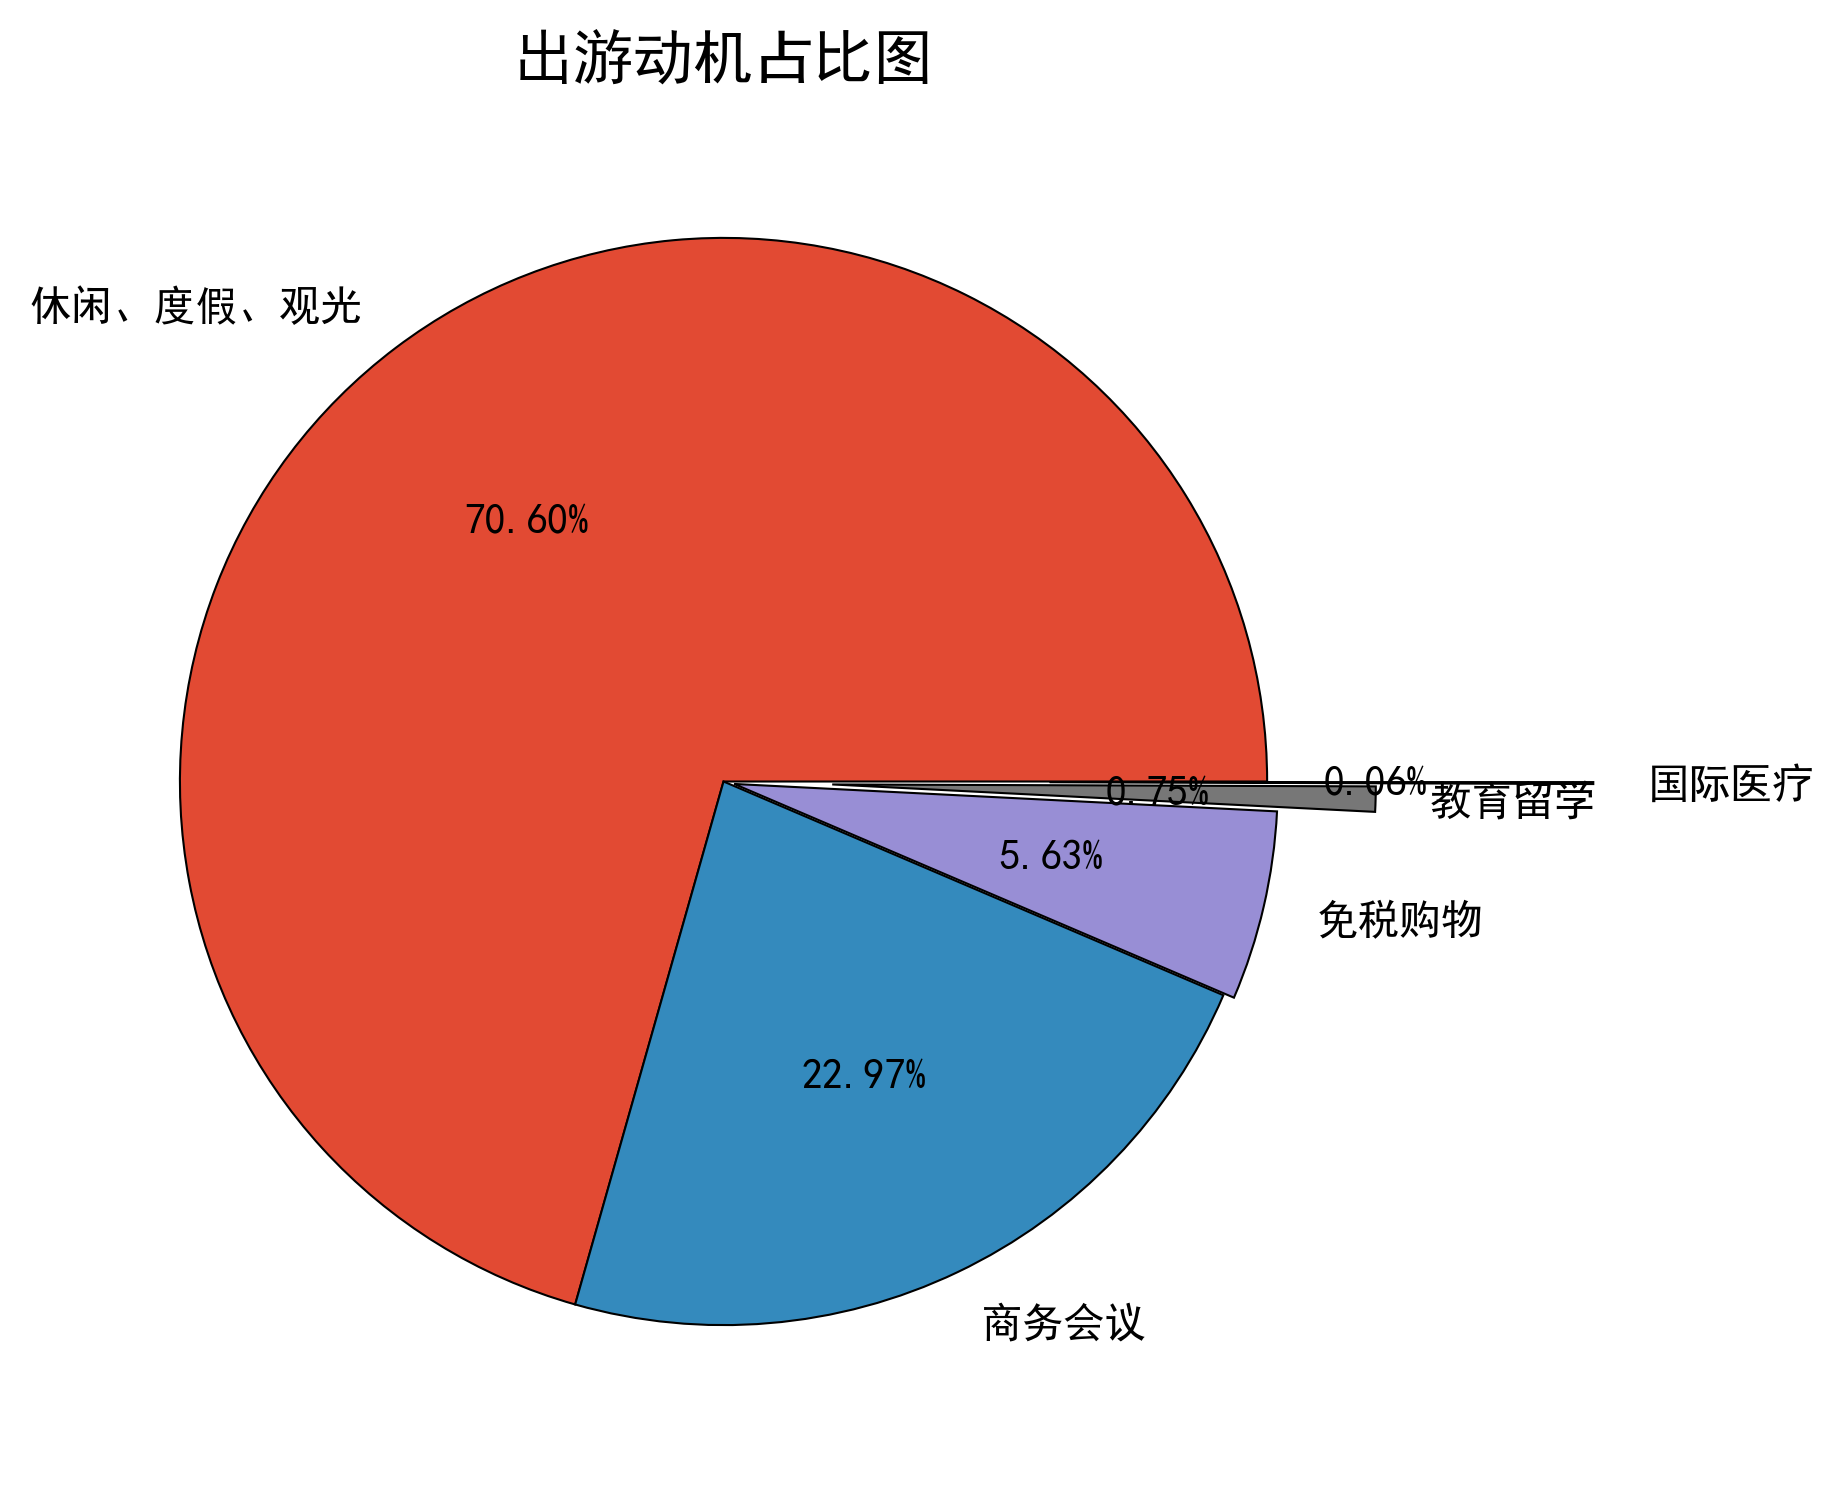

In [42]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(9,6),dpi = 300)
plt.style.use('ggplot')
explo = [0,0,0.02,0.2,0.6]
plt.pie(list_values,labels=list_key,explode=explo,startangle=0,autopct='%1.2f%%',wedgeprops={'edgecolor':'black'})
plt.title('出游动机占比图')
plt.savefig('出游动机占比图.jpg')
plt.show()

后根据上面的统计，最后画出出游动机的饼图

下面这一块是计算它们的逗留天数

In [50]:
def tsjs(x):
    x = str(x)
    x = x.replace('天','').strip(" ")
    if x == np.nan:
        return 0
    else:
        return x

data1['逗留天数'] = data1['逗留天数'].apply(tsjs)
data2['天数'] = data2['天数'].apply(tsjs)
data3['出行天数'] = data3['出行天数'].apply(tsjs)

data4['逗留天数'] = data4['逗留天数'].apply(tsjs)
data5['天数'] = data5['天数'].apply(tsjs)
data6['出行天数'] = data6['出行天数'].apply(tsjs)

In [51]:
data = pd.concat([data1['逗留天数'],data2['天数'],data3['出行天数'],data4['逗留天数'],data5['天数'],data6['出行天数']])
counts = {}
for number in data.values:
    counts[number] = counts.get(number,0) + 1

In [52]:
counts.pop('nan')

2313

In [53]:
ls = list(counts.items())
ls.sort(key=lambda x:x[1],reverse=True)

In [54]:
list_key = []
list_values = []
for key,values in ls:
    list_key.append(key)
    list_values.append(values)

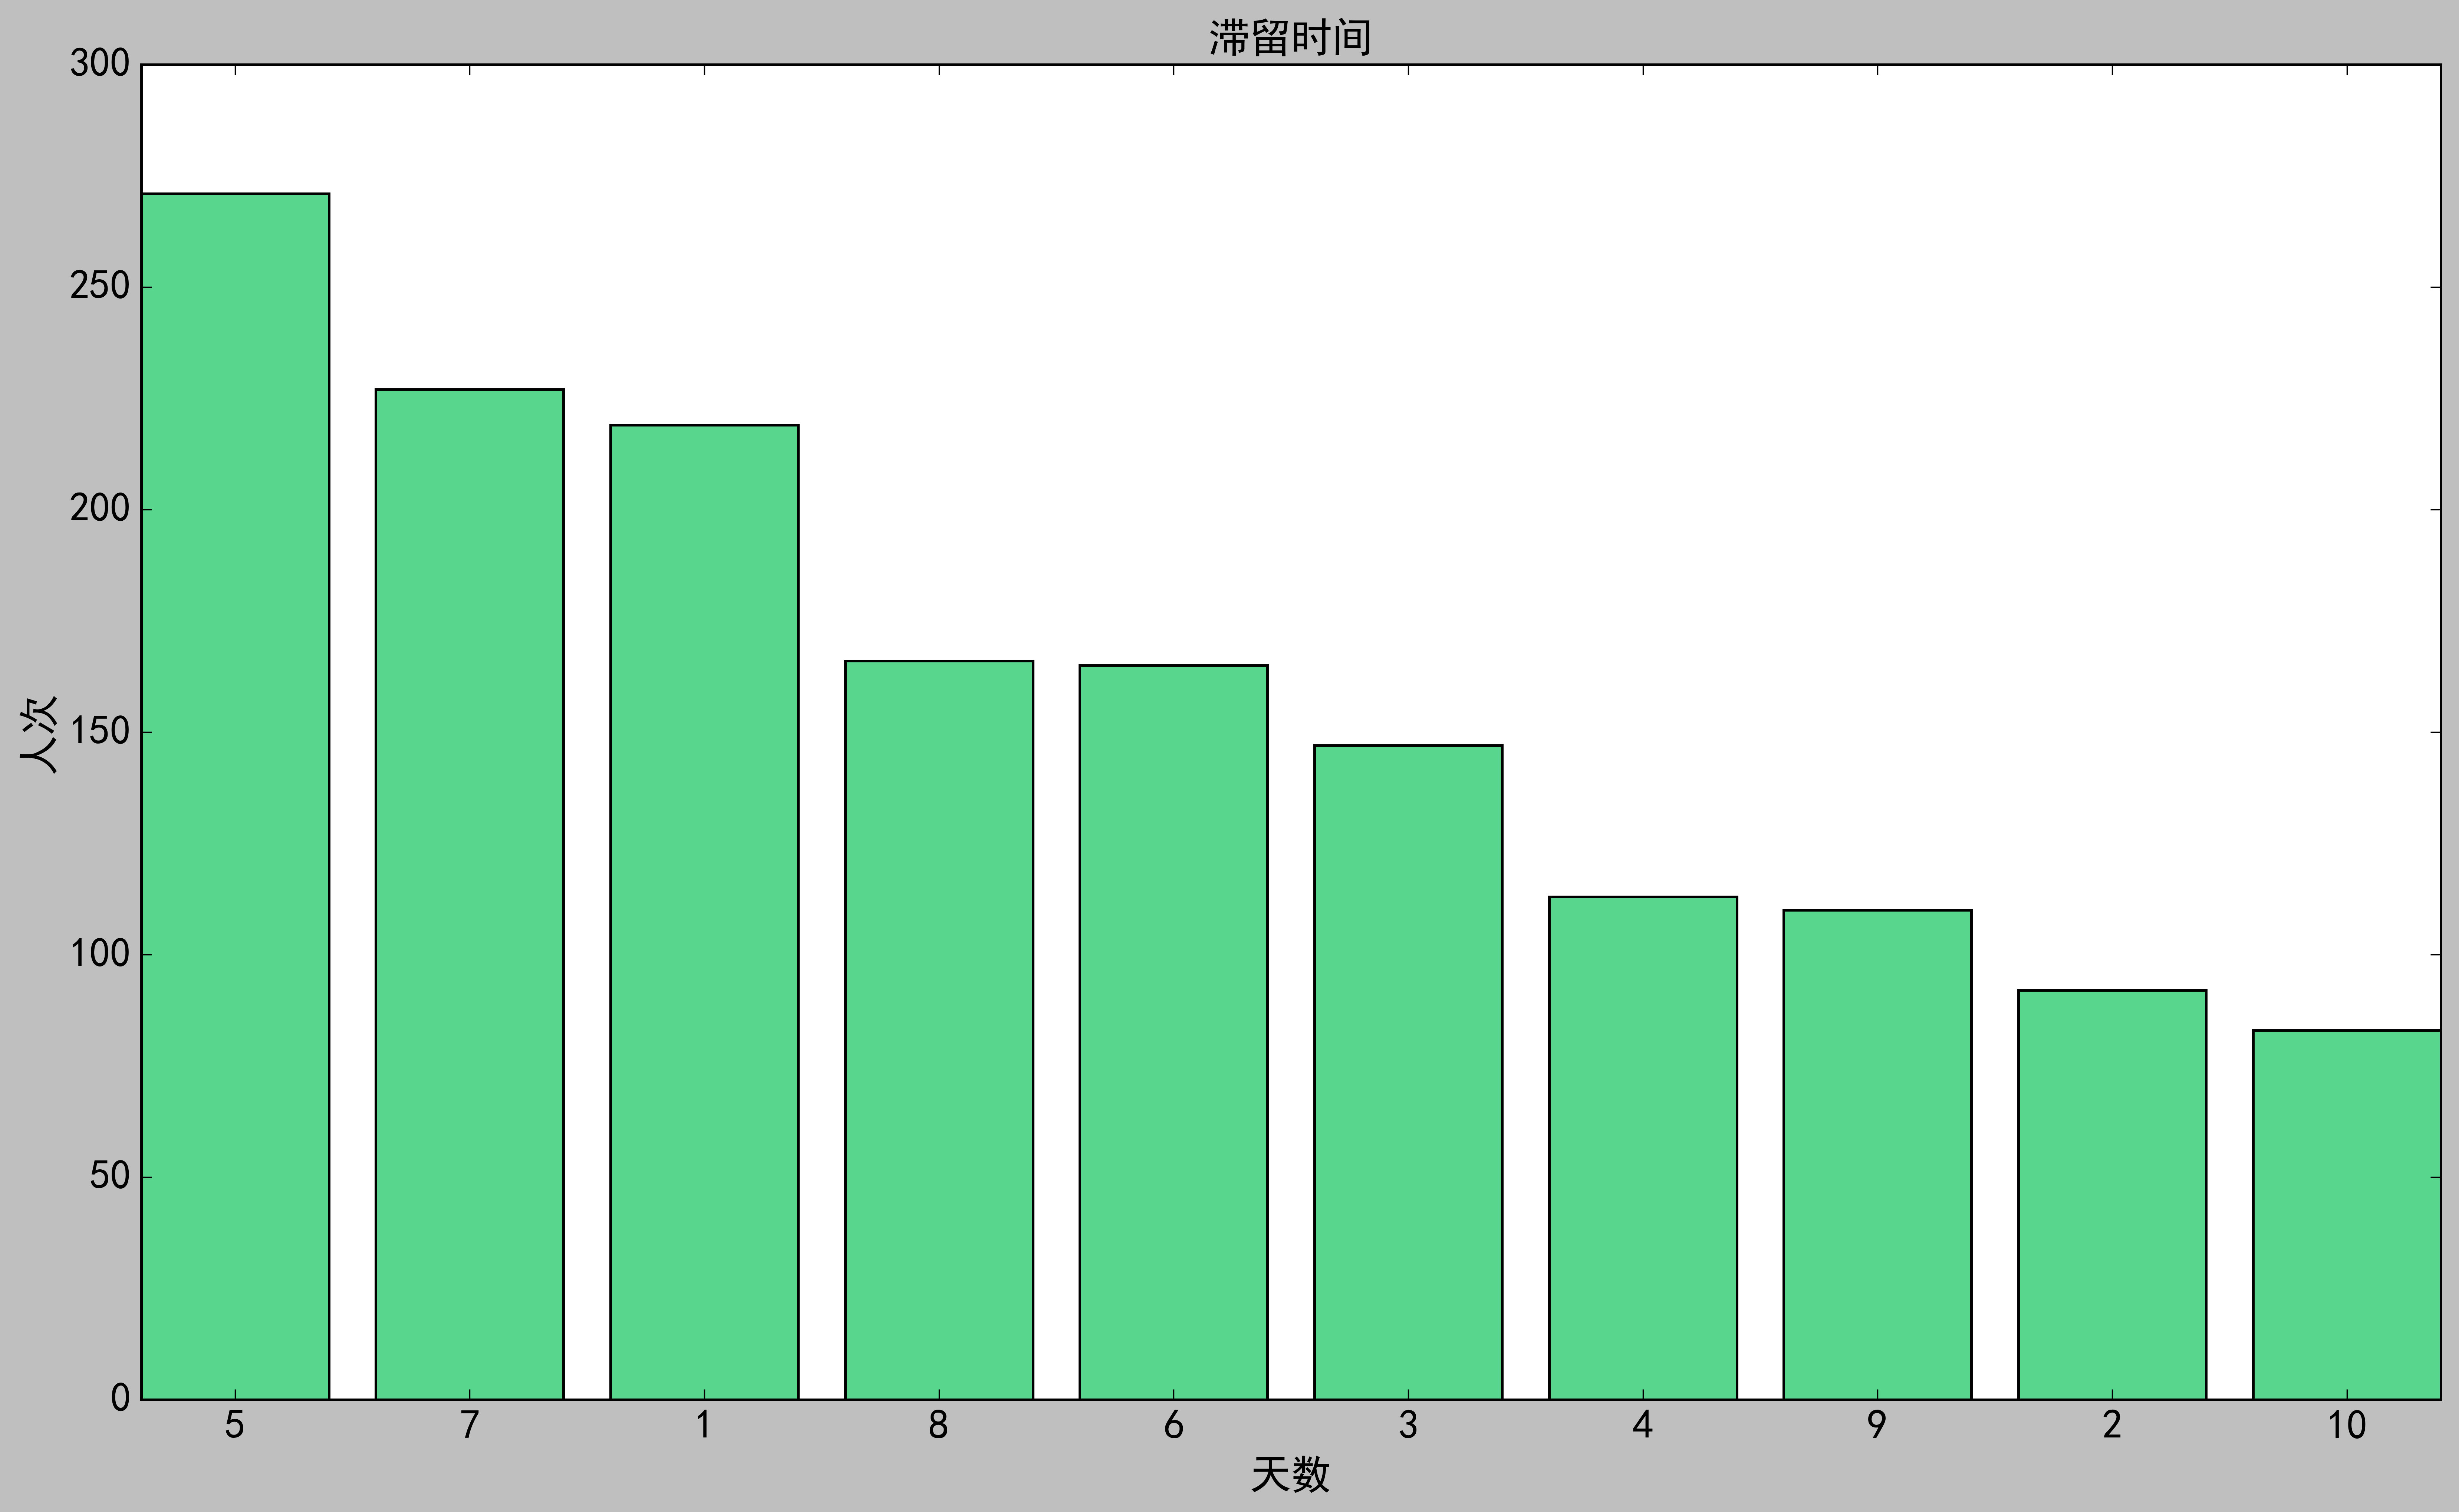

In [55]:
plt.style.use('classic')
plt.figure(figsize=(16,9),dpi=500)
plt.bar(list_key[0:10],list_values[0:10],color='#58D68D')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.tick_params(labelsize=16)
font1 = {
        'size': 16,
    }
plt.title("滞留时间",font1)
plt.xlabel("天数",font1)
plt.ylabel("人次",font1)
plt.savefig('滞留时间.jpg')
plt.show()

根据每个人逗留天数的统计，来画出柱状图，得知一般逗留的天数都是在10天以内

上面这一块是则是画出高频词的词云图

In [69]:
#数据处理库
import numpy as np
import pandas as pd
import glob
import re
import jieba 

# 定义分词函数
def get_cut_words(content_series):
    # 读入停用词表
    stop_words = [] 
    
    with open("./data/stopwords_cn.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())            

    # 分词
    word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)
    list_word = []
    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i)>=2]
    return word_num_selected
#     for word in word_num_selected:
#         for w in word:
#             list_word.append(w)
#     return list_word
    

In [70]:
text1 = get_cut_words(content_series=df3['内容'])
ditc = {}
list_word = []
list_count = []
for t in text1:
    ditc[t] = ditc.get(t, 0) + 1
ls = list(ditc.items())
ls.sort(key=lambda x: x[1], reverse=True)
for i in range(len(ls)):
    word, count = ls[i]
    list_word.append(word)
    list_count.append(count)

df1 = pd.DataFrame()

df1['word'] = list_word
df1['count'] = list_count
df1.to_csv('./data/高频词.csv',encoding='utf-8-sig') 

In [73]:
text1 = get_cut_words(content_series=df2['内容'])
ditc = {}
list_word = []
list_count = []
for t in text1:
    ditc[t] = ditc.get(t, 0) + 1
ls = list(ditc.items())
ls.sort(key=lambda x: x[1], reverse=True)
for i in range(len(ls)):
    word, count = ls[i]
    list_word.append(word)
    list_count.append(count)

df1 = pd.DataFrame()

df1['word'] = list_word
df1['count'] = list_count
df1.to_csv('./data/高频词2022.csv',encoding='utf-8-sig') 

In [75]:
#可视化库
from pyecharts.charts import *
from pyecharts import options as opts 
from pyecharts.globals import ThemeType  
from IPython.display import Image 
df2 = pd.read_csv('./data/高频词.csv',encoding='utf-8-sig')
data_pair_1 = [(i, int(j)) for i, j in zip(df2['word'], df2['count'])]
import pyecharts.options as opts
from pyecharts.charts import WordCloud
from pyecharts.globals import ThemeType
w = (
    WordCloud(init_opts=opts.InitOpts(theme=ThemeType.LIGHT,width="600px",height="400px"))
    .add(series_name="热词-云图", data_pair=data_pair_1[0:100],word_size_range=[15, 66])
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="热词-云图", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True),
    )
    .render("热词-云图.html")
)



上面这一块则是统计所以高频词的词频次数，最后用CSV文件把数据保存下来

这里是把上面高频词的前100个进行共现矩阵的计算去统计词与词之间的联系

In [77]:
""" 第三步:共现矩阵计算 共现词频 文件 """
list_word = df2['word']
words = codecs.open("./data/word_node.txt", "a+", "utf-8")
i = 0
while i<len(list_word[0:50]):  #len(name)
    student1 = list_word[i]
    j = i + 1
    while j<len(list_word[0:50]):
        student2 = list_word[j]
        #判断学生是否共现 共现词频不为0则加入
        if word_vector[i][j]>0:
            words.write(student1 + " " + student2 + " " 
                + str(word_vector[i][j]) + "\r\n")
        j = j + 1
    i = i + 1
words.close()

In [78]:
""" 第四步:图形生成 """
a = []
f = codecs.open('./data/word_node.txt','r','utf-8')
line = f.readline()
i = 0
A = []
B = []
while line!="":
    a.append(line.split())   #保存文件是以空格分离的
    A.append(a[i][0])
    B.append(a[i][1])
    i = i + 1
    line = f.readline()
elem_dic = tuple(zip(A,B)) 
f.close()

D:\rgzn\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


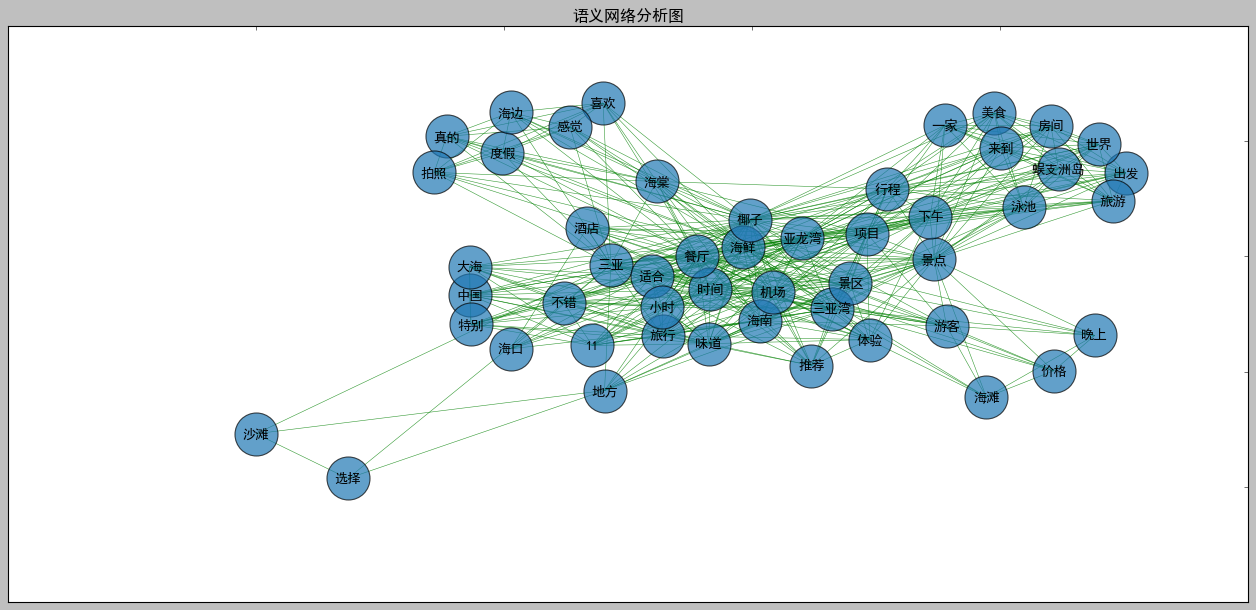

In [79]:
import matplotlib
colors = ["red","green","blue","yellow"]
G = nx.Graph()
G.add_edges_from(list(elem_dic))
matplotlib.rcParams['font.sans-serif'] = ['SimHei']   
matplotlib.rcParams['font.family']='sans-serif'
plt.figure(figsize=(20, 9))
pos=nx.spring_layout(G,iterations=100)
nx.draw_networkx_nodes(G, pos, alpha=0.7,node_size=1500)
nx.draw_networkx_edges(G,pos,width=0.5,alpha=0.8,edge_color='g')
nx.draw_networkx_labels(G, pos, font_family='sans-serif', alpha=1)
plt.title("语义网络分析图")
plt.savefig('语义网络分析图.jpg')
plt.show()

最后就是通过上面的关联来生成语义网络分析图

In [80]:
df1 = pd.read_excel('./data/clean_data2021.xlsx')
df2 = pd.read_excel('./data/clean_data2022.xlsx')
df3 = pd.concat([df1,df2],axis=0)
df3

,内容,正文长度,情感分值
0,这是一篇搁置了两个月的游记虽然对三亚行程记忆犹新只是不知道该如何用文字描述这种悸动终于有时间...,18592,0.9954
1,第一次来写游记这次跟以往每一次出去玩都信誓旦旦的说我要记录下来不一样这次我真的来写了原本计划...,12460,0.9886
2,浓浓秋意由西至东从北到南地拂遍祖国大地向往温暖阳光的候鸟们即将蠢蠢欲动准备启程远航它们心驰神...,9256,0.3345
3,11请到天涯海角来请到天涯海角来这里四季春常在海南岛上春风暖好花叫你喜心怀经历过这不平凡的2...,17151,0.9966
4,久违了阔别250多天后才出发原本今年2月就打算去韩国转一圈各种装备攻略签证都搞定了然而五一那...,11980,0.9959
...,...,...,...
2289,海南不止有三亚的四大海湾三大雨林三大旅游海岛还有中部地区的原始雨林黎苗风情还有西部地区更纯天...,3057,0.9985
2290,第四站亚龙湾热带天堂森林公园4A景区亲临冯小刚执导葛尤舒琪主演的非诚勿扰2情美大片拍摄地是上...,289,0.9941
2291,长沙机场候机中推荐一个朋友小雨专业做海南旅游定制的可以帮你代订景区门票酒店比你在平台上定便宜...,492,0.9956
2292,超级大的螃蟹亚龙湾海鲜广场吃的海鲜加火锅食材和加工费总共800多厨师烧的很不错四个人吃的很H...,584,0.9949


In [81]:
data1 = df3[df3['情感分值'] > 0.9]
data2 = df3[(df3['情感分值'] <= 0.9) & (df3['情感分值'] > 0.7) ]
data3 = df3[(df3['情感分值'] <= 0.7) & (df3['情感分值'] > 0.5) ]
data4 = df3[(df3['情感分值'] <= 0.5) & (df3['情感分值'] > 0.3) ]
data5 = df3[(df3['情感分值'] <= 0.3 )& (df3['情感分值'] > 0.1) ]
data6 = df3[df3['情感分值'] <= 0.1]
print(len(data1),len(data2),len(data3))
print(len(data4),len(data5),len(data6))

3340 34 18
13 48 30


In [84]:
data1 = df2[df2['情感分值'] > 0.9]
data2 = df2[(df2['情感分值'] <= 0.9) & (df2['情感分值'] > 0.7) ]
data3 = df2[(df2['情感分值'] <= 0.7) & (df2['情感分值'] > 0.5) ]
data4 = df2[(df2['情感分值'] <= 0.5) & (df2['情感分值'] > 0.3) ]
data5 = df2[(df2['情感分值'] <= 0.3 )& (df2['情感分值'] > 0.1) ]
data6 = df2[df2['情感分值'] <= 0.1]
print(len(data1),len(data2),len(data3))
print(len(data4),len(data5),len(data6))

2175 21 16
10 45 27


这个饼图的生成是基于高频词，然后把里面的词进行归类，最后统计出来的饼图

In [85]:
df1 = pd.read_csv('./data/高频词.csv',encoding='utf-8-sig')
df2 = pd.read_csv('./data/高频词2022.csv',encoding='utf-8-sig')

In [86]:
import paddlehub as hub
#这里使用了百度开源的成熟NLP模型来预测情感倾向
senta = hub.Module(name="senta_bilstm")
texts = df1['word'].tolist()
input_data = {'text':texts}
res = senta.sentiment_classify(data=input_data)
df1['情感分值'] = [x['positive_probs'] for x in res]
df1.head()

D:\rgzn\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
D:\rgzn\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.ht

,Unnamed: 0,word,count,情感分值
0,0,三亚,34547,0.8222
1,1,酒店,27584,0.5340
2,2,海南,18017,0.7358
3,3,海鲜,10767,0.6309
4,4,椰子,9183,0.5369


In [88]:
data1 = df1[df1['情感分值'] >=0.9]
data1.to_csv("./data/2020-2022正面情感词.csv",encoding='utf-8-sig')
data2 = df1[df1['情感分值'] <=0.1]
data2.to_csv("./data/2020-2022负面情感词.csv",encoding='utf-8-sig')

In [87]:
import paddlehub as hub
#这里使用了百度开源的成熟NLP模型来预测情感倾向
senta = hub.Module(name="senta_bilstm")
texts = df2['word'].tolist()
input_data = {'text':texts}
res = senta.sentiment_classify(data=input_data)
df2['情感分值'] = [x['positive_probs'] for x in res]
df2.head()

[2022-06-12 00:24:24,507] [    INFO] - Installing senta_bilstm module
[2022-06-12 00:24:24,699] [    INFO] - Module senta_bilstm already installed in C:\Users\96075\.paddlehub\modules\senta_bilstm
[2022-06-12 00:24:30,889] [    INFO] - Installing lac module
[2022-06-12 00:24:30,892] [    INFO] - Module lac already installed in C:\Users\96075\.paddlehub\modules\lac


,Unnamed: 0,word,count,情感分值
0,0,三亚,18577,0.8423
1,1,酒店,13362,0.5617
2,2,海南,8498,0.7439
3,3,时间,4796,0.4994
4,4,海鲜,4696,0.6684


In [89]:
data1 = df2[df2['情感分值'] >=0.9]
data1.to_csv("./data/2022正面情感词.csv",encoding='utf-8-sig')
data2 = df2[df2['情感分值'] <=0.1]
data2.to_csv("./data/2022负面情感词.csv",encoding='utf-8-sig')